In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [4]:
# split X, y

X = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
train_data = X_train.join(y_train)

In [8]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1874,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806,INLAND,107200.0
9660,-121.18,41.31,22.0,2124.0,432.0,829.0,313.0,2.4519,INLAND,57500.0
15087,-116.93,32.82,26.0,4129.0,714.0,1820.0,718.0,4.2586,<1H OCEAN,171000.0
14070,-117.12,32.76,43.0,2336.0,644.0,1203.0,614.0,2.3594,NEAR OCEAN,127800.0
10258,-117.87,33.85,33.0,45.0,11.0,34.0,10.0,5.2949,<1H OCEAN,350000.0
...,...,...,...,...,...,...,...,...,...,...
13791,-117.51,34.41,5.0,2884.0,567.0,1396.0,465.0,3.7361,INLAND,119600.0
16637,-120.80,35.33,20.0,2200.0,393.0,996.0,365.0,3.5870,NEAR OCEAN,330000.0
15559,-117.07,33.11,17.0,5565.0,1237.0,3004.0,1139.0,3.0054,<1H OCEAN,142300.0
10688,-117.72,33.62,21.0,2322.0,518.0,662.0,457.0,3.1679,<1H OCEAN,110000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

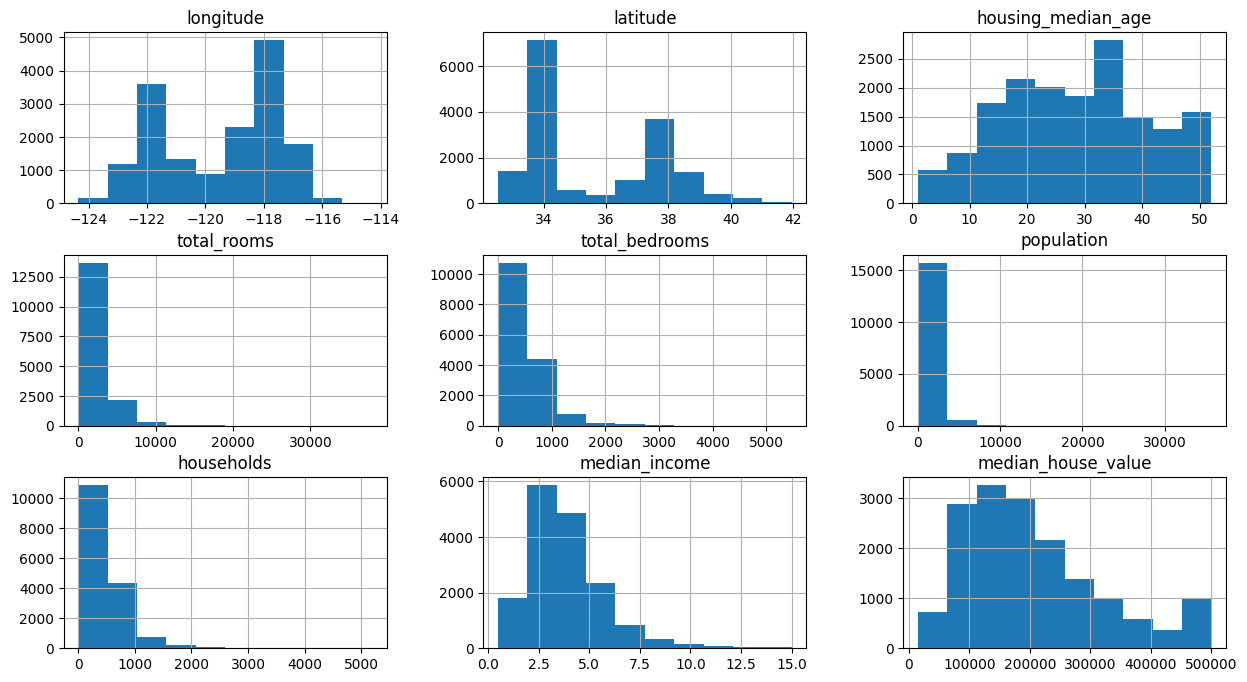

In [9]:
train_data.hist(figsize=(15,8))

In [10]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.923745,-0.107521,0.048632,0.074094,0.104046,0.061213,-0.018945,-0.046417,0.323222,-0.058003,0.009692,-0.472578,0.041179
latitude,-0.923745,1.000000,0.009567,-0.038688,-0.069573,-0.111332,-0.074780,-0.078538,-0.144886,-0.449805,0.354911,-0.016744,0.356606,-0.158131
housing_median_age,-0.107521,0.009567,1.000000,-0.361663,-0.323992,-0.298895,-0.306074,-0.109596,0.110259,0.050926,-0.237680,0.021241,0.250251,0.021035
total_rooms,0.048632,-0.038688,-0.361663,1.000000,0.930699,0.854285,0.919500,0.197986,0.136853,-0.002669,0.026983,-0.006055,-0.026332,-0.008766
total_bedrooms,0.074094,-0.069573,-0.323992,0.930699,1.000000,0.873953,0.979541,-0.006168,0.052410,0.019122,-0.003680,-0.002413,-0.024652,-0.000156
population,0.104046,-0.111332,-0.298895,0.854285,0.873953,1.000000,0.903646,0.006693,-0.022911,0.070240,-0.016467,-0.009633,-0.063861,-0.021291
households,0.061213,-0.074780,-0.306074,0.919500,0.979541,0.903646,1.000000,0.015335,0.067856,0.042528,-0.035394,-0.008004,-0.015982,0.001443
median_income,-0.018945,-0.078538,-0.109596,0.197986,-0.006168,0.006693,0.015335,1.000000,0.689877,0.171242,-0.243786,-0.008946,0.061137,0.028702
median_house_value,-0.046417,-0.144886,0.110259,0.136853,0.052410,-0.022911,0.067856,0.689877,1.000000,0.265063,-0.488452,0.026777,0.158238,0.137794
<1H OCEAN,0.323222,-0.449805,0.050926,-0.002669,0.019122,0.070240,0.042528,0.171242,0.265063,1.000000,-0.609695,-0.013942,-0.312200,-0.342884


<Axes: >

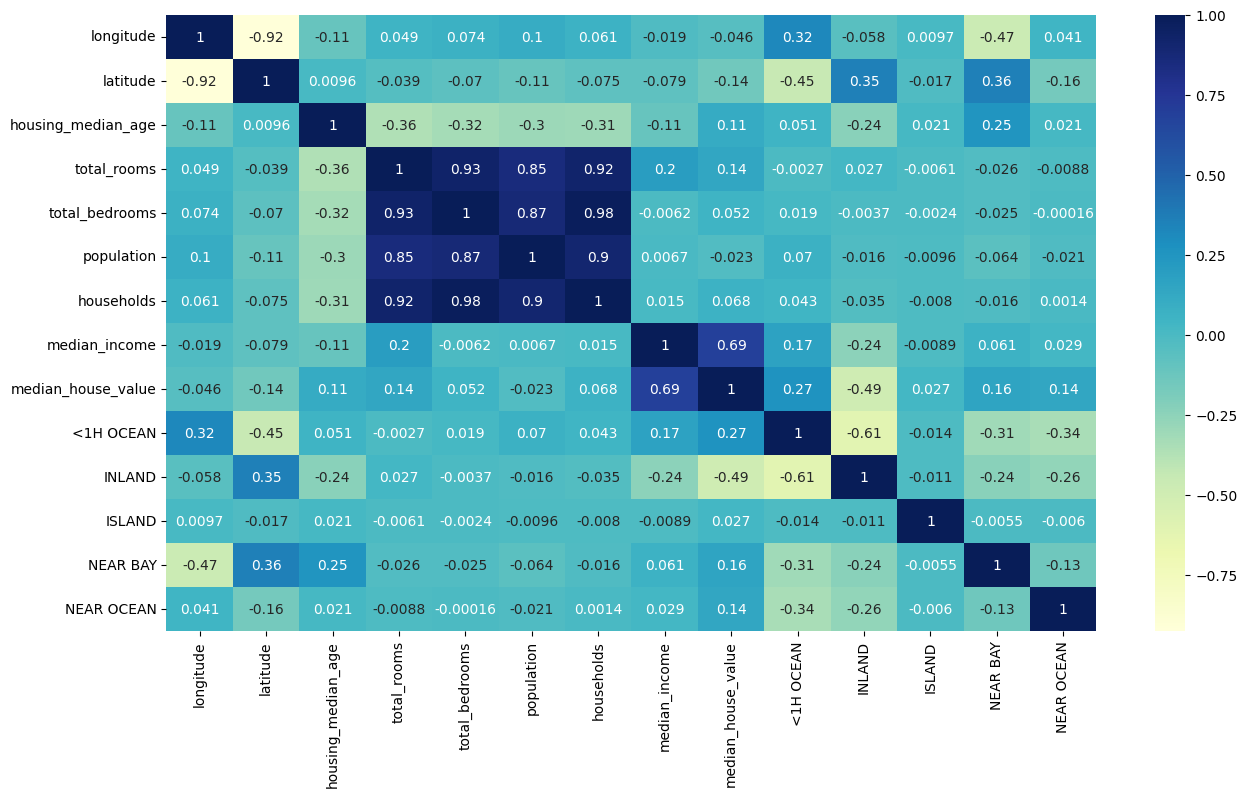

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [12]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

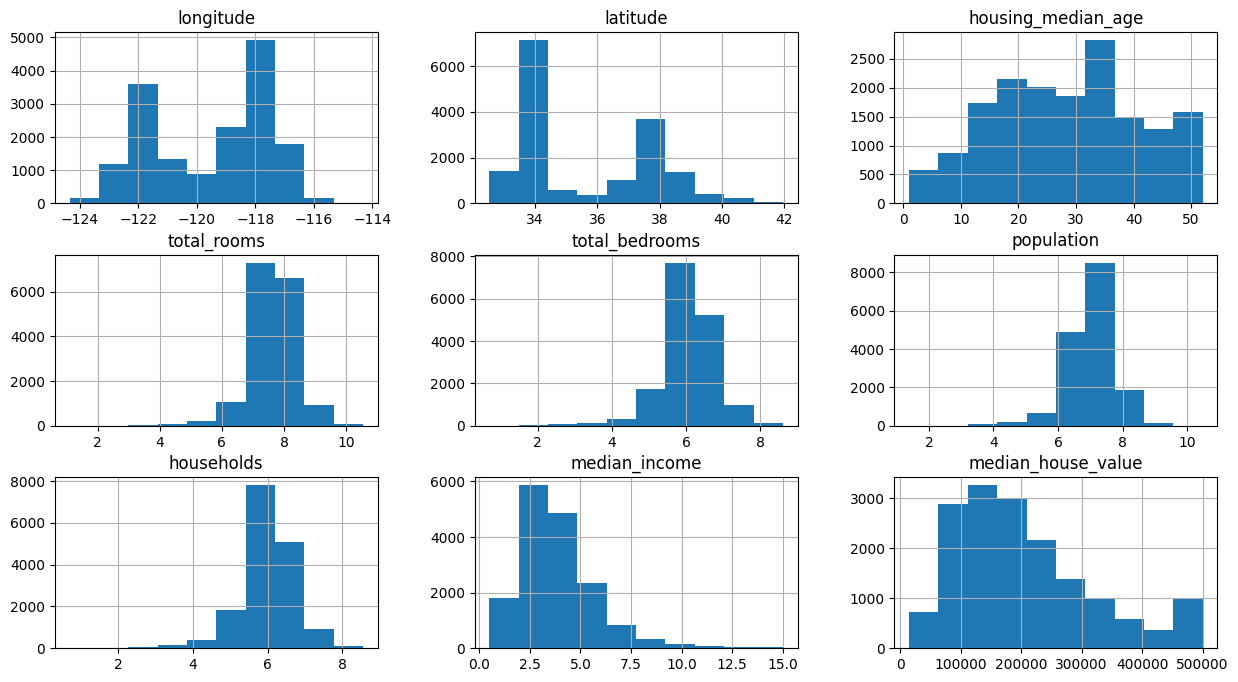

In [13]:
train_data.hist(figsize=(15,8))

<Axes: xlabel='latitude', ylabel='longitude'>

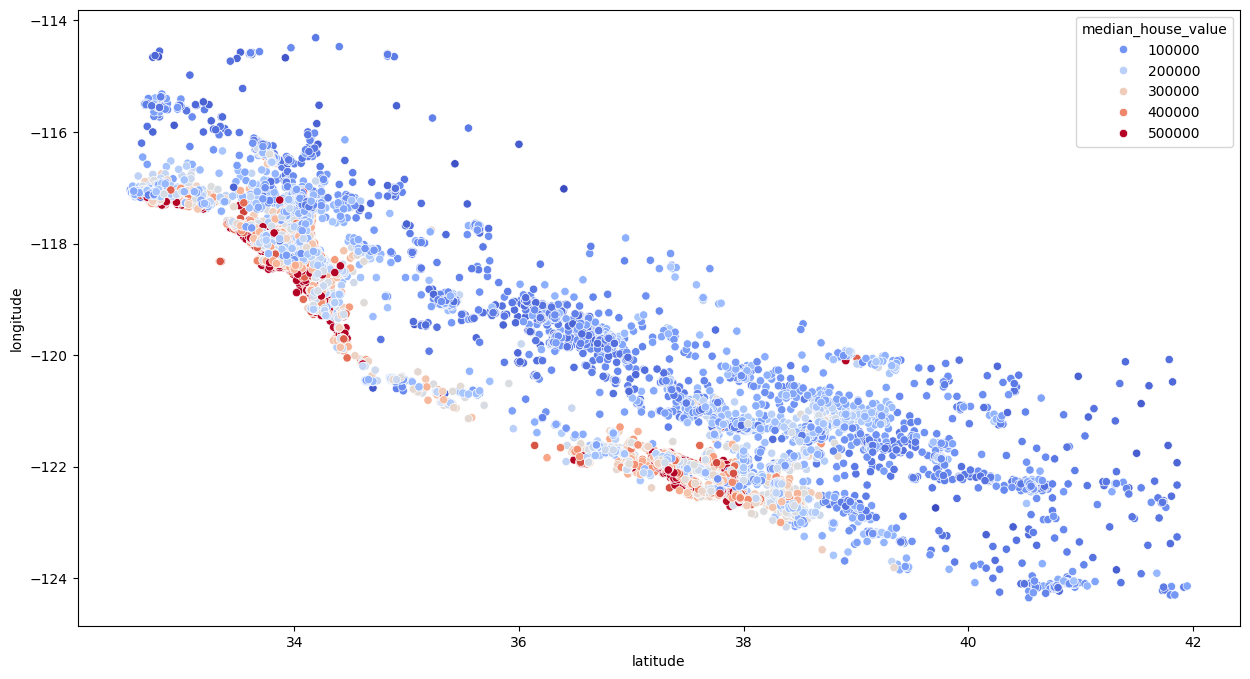

In [14]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [16]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

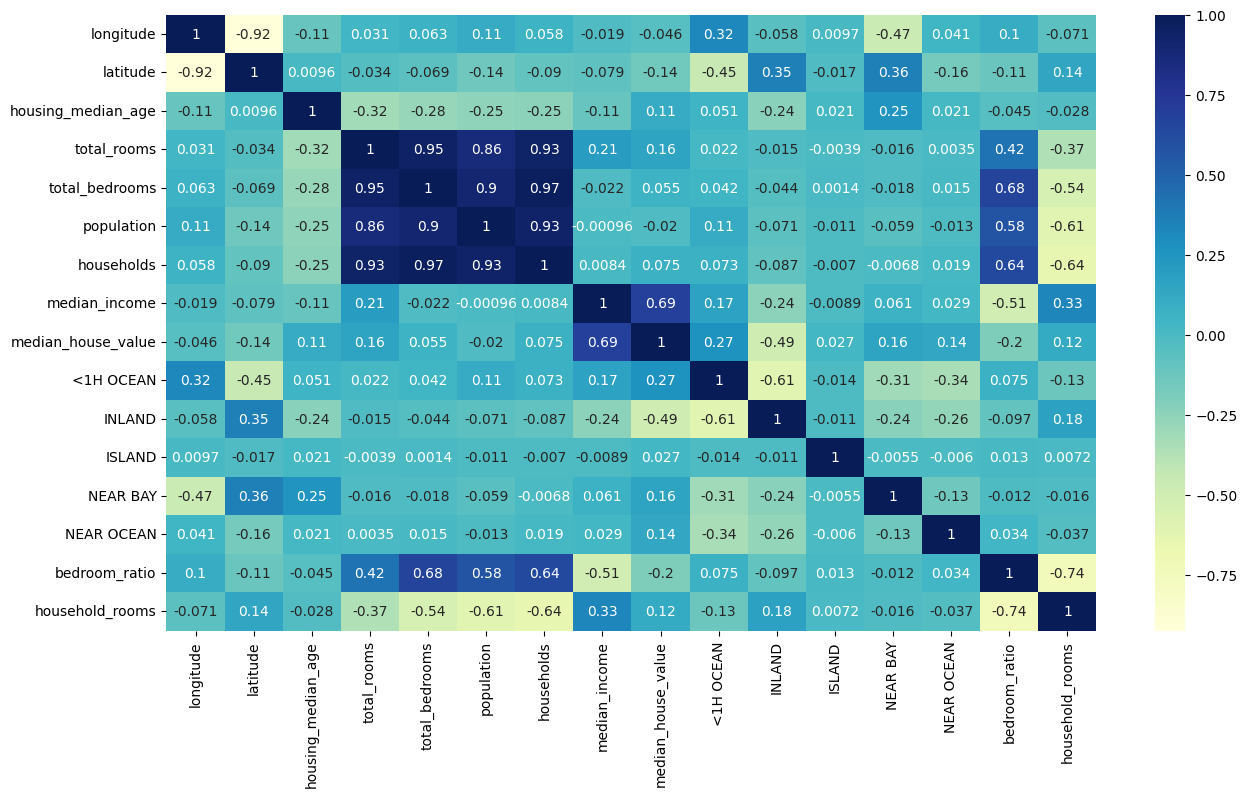

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [25]:
scaler = StandardScaler()
X_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [22]:
X_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

In [26]:
X_test_s = scaler.transform(X_test)

In [27]:
reg.score(X_test_s,y_test)

0.66433216939896

In [33]:
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
forest.score(X_test,y_test)

0.9745033374858967

In [41]:
param_grid = {
    "n_estimators" : [100,200,300],
    "min_samples_split" : [2,4,6,8],
    "max_depth" : [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True
                           )

grid_search.fit(X_train, y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test,y_test)

0.9721563908829384